We are going to solve a circuits diagram problem using Python and the SchemDraw package.  Our circuit has seven resistors and three loops. The table of resistance values are below:

| V<sub>t</sub> =| 5.20 V |
| --- | --- |
| R<sub>1</sub> =| 13.2 m&Omega; |
| R<sub>2</sub> =| 21.0 m&Omega; |
| R<sub>3</sub> =| 3.60 m&Omega; |
| R<sub>4</sub> =| 15.2 m&Omega; |
| R<sub>5</sub> =| 11.9 m&Omega; |
| R<sub>6</sub> =| 2.20 m&Omega; |
| R<sub>7</sub> =| 7.40 m&Omega; |

First we will import the necesary packages to build the circuit diagram

In [1]:
import matplotlib.pyplot as plt
#plt.xkcd() #to make the diagram look hand drawn
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e

#### For documentation see:
https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html

Now we'll build the circuit diagram by creating a SchemDraw Drawing object and adding elements to it

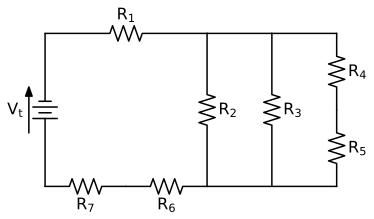

In [16]:
d = schem.Drawing(unit=2.5)
R7 = d.add(e.RES, d='right', botlabel='$R_7$')
R6 = d.add(e.RES, d='right', botlabel='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('7_resistors_3_loops.pdf')
d.save('7_resistors_3_loops.png')

Now we'll find the total resistance of the circuit R<sub>t</sub> using the individual resistances.

In [32]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R45, R67

(0.0271, 0.009600000000000001)

In [33]:
R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
R2345

0.002760164901786436

In [34]:
Rt = R1 + R2345 + R67
Rt

0.025560164901786437

Find V<sub>6</sub> and V<sub>7</sub>

In [35]:
It = Vt/Rt
It

203.4415669844354

In [36]:
V6 = It * R6
V7 = It * R7
V6, V7

(0.44757144736575794, 1.505467595684822)

Find I<sub>3</sub> and I<sub>6</sub>

In [37]:
I2345 = It
V2345 = I2345 * R2345
V2345

0.5615322727548728

In [39]:
V3 = V2345
I3 = V3 / R3

I6 = It

I3, I6

(155.98118687635358, 203.4415669844354)

Find P<sub>7</sub> and P<sub>4</sub>

In [40]:
P7 = R7 * It**2
P7

306.27468671041066

In [41]:
V45 = V2345
I45 = V45/R45
I45

20.720748072135528

In [45]:
I4 = I45
P4 = R4 * I4**2
P4

6.526110890167405